### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 6
### Due: Saturday, Mar 14th at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

In [1]:
# Kludge to fix the bug with draw_ellipse in astroML
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                          (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]),
                          width=2 * scale * sigma1, height=2 * scale * sigma2,
                          angle=alpha * 180. / np.pi,
                          **kwargs))

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

### Solution

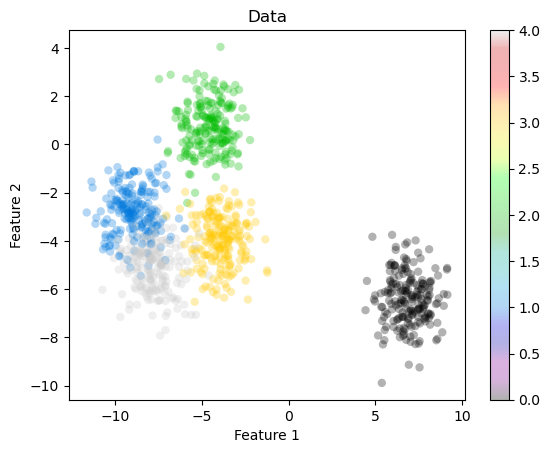

best bandwidth: 0.4724137931034482


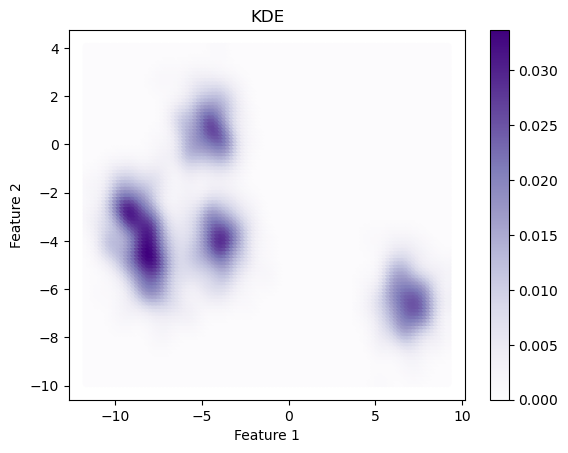

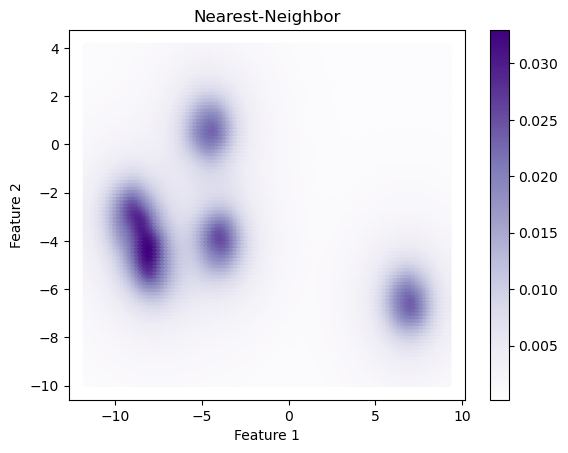

C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

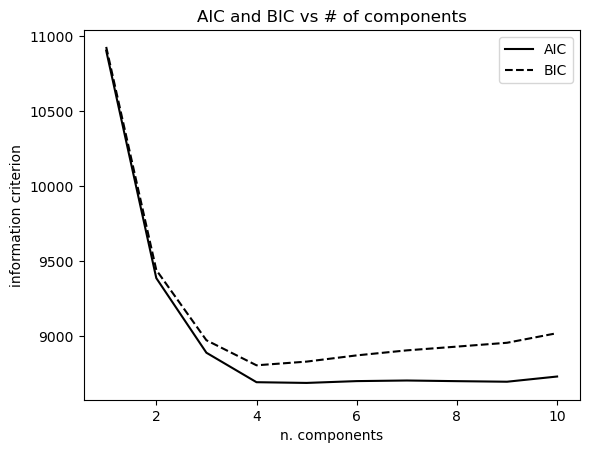

optimal number according to BIC: 4


C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


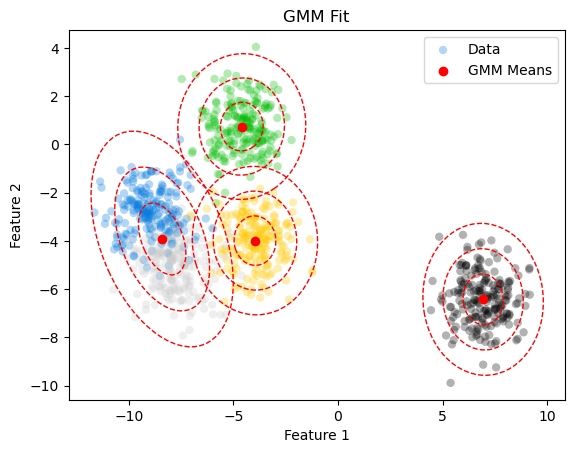

C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


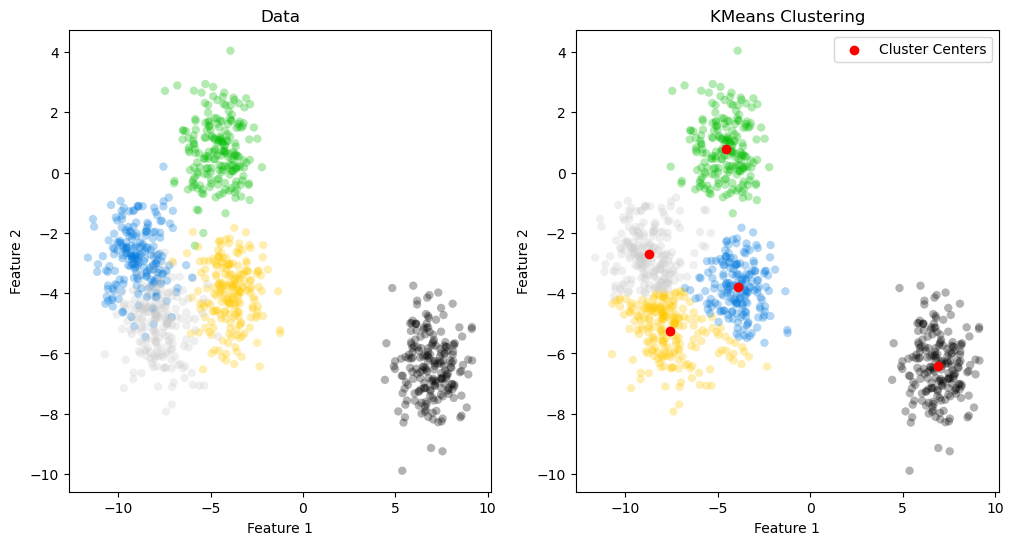

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from astroML.density_estimation import KNeighborsDensity
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#1.
data = np.load('/Users/sabr/ASTR_3300_S2025/coursework/homeworks/hw_data/hw6_data_1.npy')
X = data[:,0:2]
labels = data[:,2]
plt.scatter(X[:,0], X[:,1], c=labels, cmap="nipy_spectral", alpha=0.3, edgecolor="None")
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data')
plt.show()

#2.
bwrange = np.linspace(0.1, 1, 30)
K = 5
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K)
grid.fit(X)
h_opt = grid.best_params_['bandwidth']
print('best bandwidth:',h_opt)
kde = KernelDensity(kernel='gaussian', bandwidth=h_opt)
kde.fit(X)
u = np.linspace(X[:,0].min(),X[:,0].max(),100)
v = np.linspace(X[:,1].min(),X[:,1].max(),100)
Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(u, v)))).T
dens = np.exp(kde.score_samples(Xgrid))
plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, cmap="Purples", edgecolor="None")
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KDE')
plt.show()

#3.
N = len(X[:,0])
k = 125
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(X)
dens_nbrs = nbrs.eval(Xgrid) / N
plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens_nbrs, cmap="Purples", edgecolor="None")
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Nearest-Neighbor')
plt.show()

#4.
N = np.arange(1, 11)
models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')
plt.xlabel('n. components')
plt.ylabel('information criterion')
plt.title('AIC and BIC vs # of components')
plt.legend()
plt.show()
n_opt = N[np.argmin(BIC)]
print('optimal number according to BIC:',n_opt)
gm_opt = GaussianMixture(n_opt)
gm_opt.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="nipy_spectral", alpha=0.3, edgecolor="None", label='Data')
plt.scatter(gm_opt.means_[:, 0], gm_opt.means_[:, 1], c='red', label='GMM Means')
for mean, cov in zip(gm_opt.means_, gm_opt.covariances_):
    draw_ellipse(mean, cov, edgecolor='red', facecolor='none', linestyle='--')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('GMM Fit')
plt.show()

#5.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
kmeans_labels = kmeans.predict(X_scaled)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, cmap="nipy_spectral", alpha=0.3, edgecolor="None")
ax[0].set_title('Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="nipy_spectral", alpha=0.3, edgecolor="None")
ax[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', label='Cluster Centers')
ax[1].set_title('KMeans Clustering')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].legend()
plt.show()

<span style="color:green">NP: Correct! Good job! </span>